In [11]:
!pip install psaw

In [25]:
import pandas as pd
import seaborn
import matplotlib 
import datetime
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)
from psaw import PushshiftAPI
api = PushshiftAPI()

### Collecting Reddit Posts from the Cornell Subreddit
Keywords: loneliness, lonely, isolation, isolated, alone

In [13]:
api_request= api.search_submissions(subreddit='Cornell', score=">0", q="lonely", after='1546318800')

In [14]:
lonely_submissions = pd.DataFrame([submission.d_ for submission in api_request])


In [15]:
lonely_submissions.shape


(120, 72)

In [16]:
lonely_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'thumbnail', 'title', 'total_awards_received',
       'treatment_tags', 'upvote_ratio',

In [17]:
lonely_submissions[['title', 'score']].sample(10)

,title,score
85,Something that helped me make friends,1
111,Please don’t forget your dining hall bananas. They get lonely too :(,72
104,For those looking for college friends or guidance,19
49,Genuinely afraid for my mental health this semester,1
69,What else can I do,1
112,Please don't forget your dining hall banana. They get lonely too :(,63
102,Releasing a game made in CS 4152 to the Android app store! Would love if you guys checked out the alpha (Trailer Included),17
37,Discord Servers for Lonely People,1
53,Planning on studying from home but worried about feeling lonely,38
83,depressed and lonely today,1


In [18]:
lonely_submissions[['title', 'num_comments','score','created_utc']]

,title,num_comments,score,created_utc
0,This is a sign to text your ~Cornell crush~!!!,26,1,1607921479
1,In My Dreams,2,1,1607510597
2,"Trigger Warning: Depression, Mental Health Issues, Loneliness",3,1,1606201017
3,Any freshies staying for Fall Part 2?,2,1,1606147303
4,wow i’m lonely,16,12,1605759384
...,...,...,...,...
115,Cornell Japanese Animation Club is Lonely; Showing on 2/9,17,1,1549750820
116,Cool New Valentine's Challenge,2,1,1549748551
117,Does anyone else feel this way?,4,1,1548967339
118,I hate Cornell,15,1,1548298919


In [19]:
lonely_submissions['created_utc']=(pd.to_datetime(lonely_submissions['created_utc'],unit='s'))


KeyError: 'Unrecognized key "created_utc.labelsize" for group "created_utc" and name "labelsize"'

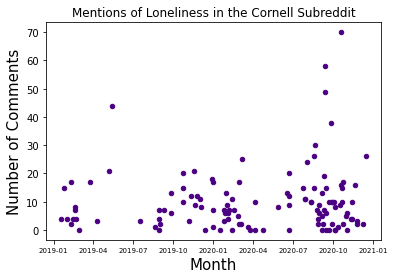

In [29]:
lonely_submissions.plot(x='created_utc', y='num_comments', kind='scatter', color='indigo')

ax = plt.gca()
plt.title('Mentions of Loneliness in the Cornell Subreddit')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Comments', fontsize=15)
matplotlib.rc('created_utc', labelsize=7)
seaborn.regplot(lonely_submissions['1607921479'],data_reduced['1547784288'])
plt.show()